## Observations and Insights 

3 Observations/Inferences from this Data
~Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.~

1.) The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84. This indicates a strong positive linear relationship between mouse weight and average tumor volume for the Capomulin treatment. 

2.) Mouse s185 Tumor Volume decreased significantly over Time Point with the Capomulin treatment. However, this is concluded based on the line plot of tumor volume versus time point for that mouse below. It is important to awknowledge that this drug treatment may not be causation, there could be other factors involved, but this is still significant to comment on in relation to this mouse.  

3.) The distribution of sex of the mice in this study is basically split even with 49.6% females and 50.4% males. There are 123 female mice and 125 male mice in this study,a total of 248 mice that we are analyzing. 

4.) The smallest mean tumor volume across each drug regimen is with the Ramicane treatment at 40.216745. The Capomulin treatment has the second smallest mean tumor volume at 40.675741.

5.) The Time Point for measuing the tumor volume varies for each mouse in this study. It is important to get a better understanding of why this is and why some mice were measured more frequently than others. 

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_table_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_table_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [260]:
# Checking the number of mice.
merged_table_df["Mouse ID"].nunique()

249

In [262]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_table_df[merged_table_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [263]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_table_df[merged_table_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [264]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_dataframe_df = merged_table_df[merged_table_df['Mouse ID'] != 'g989']
clean_dataframe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [266]:
# Checking the number of mice in the clean DataFrame.

clean_dataframe_df["Mouse ID"].nunique()

248

## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_dataframe_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_dataframe_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM" : sem})
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_dataframe_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [277]:
bar_chart_df = clean_dataframe_df.groupby("Drug Regimen").count()
bar_chart_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


Text(0, 0.5, 'Number of Measurements Taken')

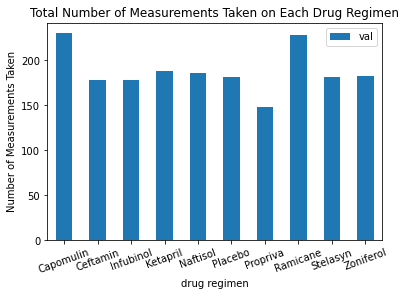

In [280]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

df = pd.DataFrame({'drug regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
                   'val':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df.plot.bar(x='drug regimen', y='val', rot=20)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.ylabel('Number of Measurements Taken')

Text(0, 0.5, 'total number of measurements taken')

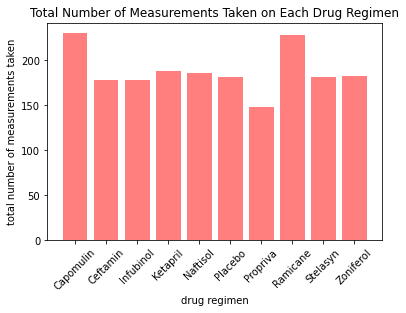

In [281]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(x_axis, drug_count, color = 'r', alpha = 0.5, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)

#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("drug regimen")
plt.ylabel("total number of measurements taken")

In [449]:
#Determine distribution of male to female mice

#Calc total mice, male & female with cleaned data

gender_df = clean_dataframe_df["Mouse ID"].nunique()
gender_df

248

In [454]:
#Calculate unique males

gender2_sort = clean_dataframe_df.loc[clean_dataframe_df["Sex"] == "Male"]   
gender2_sort["Mouse ID"].nunique()

125

In [455]:
#Calculate unique females

gender3_sort = clean_dataframe_df.loc[clean_dataframe_df["Sex"] == "Female"]   
gender3_sort["Mouse ID"].nunique()

123

In [446]:
#*Total* male to female mice ~ table created for curiosity ~

clean_dataframe_df.groupby("Sex").count()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x1c847a46a00>,
 [Text(0.013934097579311265, 1.0999117423341975, ''),
  Text(-0.0139340975793114, -1.0999117423341975, '')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

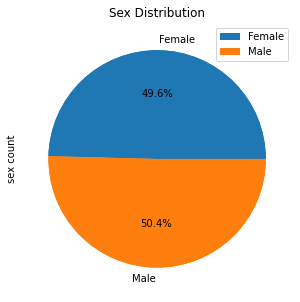

In [458]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({'sex count': [123, 125]}, 
                   index=['Female', 'Male'])

plot = df.plot.pie(y='sex count', figsize=(5, 5))

plt.title("Sex Distribution")
sex_count = [123, 125]
plt.pie(sex_count, autopct='%1.1f%%')

(-1.1192168963081732,
 1.1079352522711863,
 -1.1167571903773796,
 1.1085810220189514)

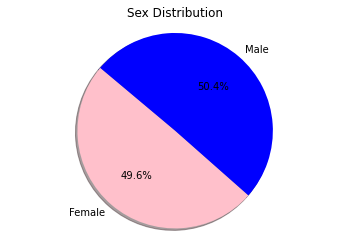

In [457]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = [123, 125]

colors = ["pink", "blue"]

plt.pie(sizes, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=140)

plt.title("Sex Distribution")

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [335]:
clean_dataframe_df['Mouse ID'].nunique()

248

In [370]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

#Get defined data for the problem: 
qob_df = clean_dataframe_df[clean_dataframe_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
qob_df = qob_df.sort_values(["Timepoint"], ascending=False)
qob_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [401]:
#Get only needed data/narrow down drug regimen; narrow down columns 

qob2_data_df = qob_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
qob2_data_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [484]:
#Calc the latest timepoint per mouse (the tumor volume at the last timepoint)
#Sort by Infubinol

Infubinol_sort = qob_data_df.loc[qob_data_df["Drug Regimen"] == "Infubinol"]   

Infubinol2_sort = Infubinol_sort.sort_values("Timepoint", ascending = False)
Infubinol2_sort = Infubinol_sort.drop_duplicates(subset="Mouse ID", keep='first')
Infubinol2_sort

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
463,Infubinol,a203,45,67.973419
473,Infubinol,a251,45,65.525743
637,Infubinol,c139,45,72.226731
834,Infubinol,f345,45,60.918767
1053,Infubinol,k483,45,66.196912
540,Infubinol,a685,45,66.083066
1813,Infubinol,y163,45,67.685569
949,Infubinol,i386,40,67.289621


In [497]:
tumors_Infubinol = Infubinol2_sort['Tumor Volume (mm3)']
tumors_Infubinol

1872    62.754451
800     62.435404
463     67.973419
473     65.525743
637     72.226731
834     60.918767
1053    66.196912
540     66.083066
1813    67.685569
949     67.289621
1076    62.117279
1312    55.629428
1397    54.656549
1225    60.165180
530     57.031862
1726    58.268442
742     60.969711
1485    55.650681
1683    50.005138
1632    54.048608
1640    51.542431
669     36.321346
1314    45.699331
1616    46.250112
1205    47.010364
Name: Tumor Volume (mm3), dtype: float64

In [435]:
#Sort by Capomulin

Capomulin_sort = qob_data_df.loc[qob_data_df["Drug Regimen"] == "Capomulin"]   

Capomulin2_sort = Capomulin_sort.sort_values("Timepoint", ascending = False)
Capomulin2_sort = Capomulin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Capomulin2_sort

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
134,Capomulin,r554,45,32.377357
124,Capomulin,y793,45,31.896238
104,Capomulin,u364,45,31.023923
164,Capomulin,t565,45,34.455298
244,Capomulin,g288,45,37.074024
282,Capomulin,l897,45,38.846876
299,Capomulin,b742,45,38.939633
224,Capomulin,w914,45,36.041047


In [501]:
tumors_Capomulin = Capomulin2_sort['Tumor Volume (mm3)']
tumors_Capomulin

440     47.685963
144     33.329098
134     32.377357
124     31.896238
104     31.023923
164     34.455298
244     37.074024
282     38.846876
299     38.939633
224     36.041047
309     38.982878
337     38.125164
204     37.311846
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
29      28.484033
39      28.430964
19      23.343598
317     38.753265
64      30.485985
1455    46.539206
340     39.952347
Name: Tumor Volume (mm3), dtype: float64

In [438]:
#Sort by Ramicane

Ramicane_sort = qob_data_df.loc[qob_data_df["Drug Regimen"] == "Ramicane"]   

Ramicane2_sort = Ramicane_sort.sort_values("Timepoint", ascending = False)
Ramicane2_sort = Ramicane_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ramicane2_sort

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
154,Ramicane,c758,45,33.397653
114,Ramicane,n364,45,31.095335
94,Ramicane,j913,45,31.560470
84,Ramicane,z578,45,30.638696
74,Ramicane,m546,45,30.564625
430,Ramicane,a444,45,43.047543
420,Ramicane,q597,45,45.220869
410,Ramicane,u196,45,40.667713
254,Ramicane,i334,45,36.374510
272,Ramicane,d251,45,37.311236


In [500]:
tumors_Ramicane = Ramicane2_sort['Tumor Volume (mm3)']
tumors_Ramicane

154    33.397653
114    31.095335
94     31.560470
84     30.638696
74     30.564625
430    43.047543
420    45.220869
410    40.667713
254    36.374510
272    37.311236
234    37.225650
214    38.810366
327    38.407618
194    36.134852
184    33.562402
174    32.978522
400    40.659006
59     30.276232
9      22.050126
49     29.128472
262    36.561652
289    38.342008
447    43.419381
453    44.183451
449    43.166373
Name: Tumor Volume (mm3), dtype: float64

In [439]:
#Sort by Ceftamin

Ceftamin_sort = qob_data_df.loc[qob_data_df["Drug Regimen"] == "Ceftamin"]   

Ceftamin2_sort = Ceftamin_sort.sort_values("Timepoint", ascending = False)
Ceftamin2_sort = Ceftamin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ceftamin2_sort

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
493,Ceftamin,a275,45,62.999356
1260,Ceftamin,o287,45,59.741901
993,Ceftamin,j296,45,61.849023
1033,Ceftamin,k210,45,68.923185
1112,Ceftamin,l471,45,67.748662
1132,Ceftamin,l661,45,59.851956
1162,Ceftamin,l733,45,64.299830
1845,Ceftamin,y769,45,68.594745
1797,Ceftamin,x822,45,61.386660
1379,Ceftamin,p438,45,61.433892


In [499]:
tumors_Ceftamin = Ceftamin2_sort['Tumor Volume (mm3)']
tumors_Ceftamin

493     62.999356
1260    59.741901
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1845    68.594745
1797    61.386660
1379    61.433892
1855    64.729837
1670    67.527482
1773    64.634949
1406    64.192341
1119    57.918381
617     55.742829
600     56.057749
1582    52.925348
840     48.722078
1122    46.784535
940     47.784682
1743    45.000000
594     45.000000
1551    45.000000
1583    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [441]:
#for me to undersand last timepoint for dif mice 

tsetgh_df = qob_data_df.loc[qob_data_df["Mouse ID"] == "w678"]
tsetgh_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
449,Ramicane,w678,5,43.166373
448,Ramicane,w678,0,45.000000


In [511]:
#Infubinol - quartile calculations & outlier calculations

quartiles = tumors_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Infubinol is: {lowerq}")
print(f"The upper quartile of TTumor Volume for drug Infubinol: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Infubinol: {iqr}")
print(f"The the median of Tumor Volume for drug Infubinol: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for drug Infubinol is: 54.04860769
The upper quartile of TTumor Volume for drug Infubinol: 65.52574285
The interquartile range of Tumor Volume for drug Infubinol: 11.477135160000003
The the median of Tumor Volume for drug Infubinol: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


#quantitatively determine if there are any potential outliers - Infubinol Drug

There is one potential outliar for the Infubinol drug with mouse ID C326. This is because the tumor volume of mouse ID C326 is less than the calculated lower bound of 36.83 mm3 (tumor volume) above at about 36.32 mm3 (tumor volume).

In [510]:
#Capomulin - quartile calculations & outlier calculations

quartiles = tumors_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Capomulin is: {lowerq}")
print(f"The upper quartile of Tumor Volume for drug Capomulin is: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Capomulin is: {iqr}")
print(f"The the median of Tumor Volume for drug Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for drug Capomulin is: 32.37735684
The upper quartile of Tumor Volume for drug Capomulin is: 40.1592203
The interquartile range of Tumor Volume for drug Capomulin is: 7.781863460000004
The the median of Tumor Volume for drug Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


#quantitatively determine if there are any potential outliers - Capomulin

There are no potential outliers for drug Capomulin since there are no final tumor volumes below about 20.7 mm3 and above about 51.83 mm3. 

In [512]:
#Ramicane - quartile calculations & outlier calculations

quartiles = tumors_Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Ramicane is: {lowerq}")
print(f"The upper quartile of Tumor Volume for drug Ramicane is: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Ramicane is: {iqr}")
print(f"The the median of Tumor Volume for drug Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for drug Ramicane is: 31.56046955
The upper quartile of Tumor Volume for drug Ramicane is: 40.65900627
The interquartile range of Tumor Volume for drug Ramicane is: 9.098536719999998
The the median of Tumor Volume for drug Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


#quantitatively determine if there are any potential outliers - Ramicane

There are no potential outliers for drug Ramicane since there are no final tumor volumes below about 17.91 mm3 and above about 54.31 mm3. 

In [513]:
#Ceftamin - quartile calculations & outlier calculations

quartiles = tumors_Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Ceftamin is: {lowerq}")
print(f"The upper quartile of Tumor Volume for drug Ceftamin is: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Ceftamin is: {iqr}")
print(f"The the median of Tumor Volume for drug Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for drug Ceftamin is: 48.72207785
The upper quartile of Tumor Volume for drug Ceftamin is: 64.29983003
The interquartile range of Tumor Volume for drug Ceftamin is: 15.577752179999997
The the median of Tumor Volume for drug Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


#quantitatively determine if there are any potential outliers - Ceftamin

There are no potential outliers for drug Ceftamin since there are no final tumor volumes below about 25.36 mm3 and above about 87.67 mm3. 

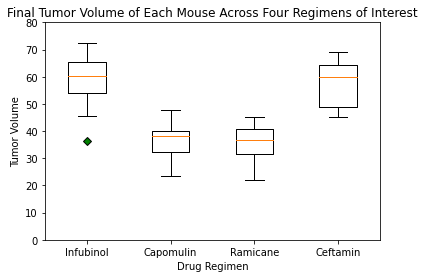

In [509]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax7.set_ylabel('Tumor Volume')
ax7.set_xlabel('Drug Regimen')
data = [tumors_Infubinol, tumors_Capomulin, tumors_Ramicane, tumors_Ceftamin]
plt.ylim(0, 80)
green_diamond = dict(markerfacecolor='g', marker='D')
ax7.boxplot(data, flierprops=green_diamond, labels=['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin',])

plt.show()


## Line and Scatter Plots

In [338]:
#Get data for all mice treated with Capomulin

test_df = clean_dataframe_df[clean_dataframe_df["Drug Regimen"].isin(["Capomulin"])]
test_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [339]:
#select one mouse treated with Capomulin - mouse ID - s185

one_mouse_df = test_df.loc[test_df["Mouse ID"] == "s185"]
one_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point with Capomulin')

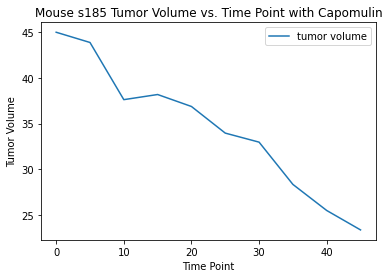

In [340]:
# Generate a line plot of tumor volume vs. time point for *a mouse* treated with Capomulin. Note only one mouse!!!!

lineplt_df = pd.DataFrame({
   'tumor volume': [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
      }, index = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
lines = lineplt_df.plot.line()

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse s185 Tumor Volume vs. Time Point with Capomulin")


In [341]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#below

In [342]:
#Get only necessary data from table 

scatter_df = test_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [343]:
avg_tumor_vol = scatter_df.groupby(scatter_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [344]:
#Looking at each mouses' weight

unique_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].nunique()
unique_mouse_weight

Mouse ID
b128    1
b742    1
f966    1
g288    1
g316    1
i557    1
i738    1
j119    1
j246    1
l509    1
l897    1
m601    1
m957    1
r157    1
r554    1
r944    1
s185    1
s710    1
t565    1
u364    1
v923    1
w150    1
w914    1
x401    1
y793    1
Name: Weight (g), dtype: int64

In [345]:
each_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].mean()
each_mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

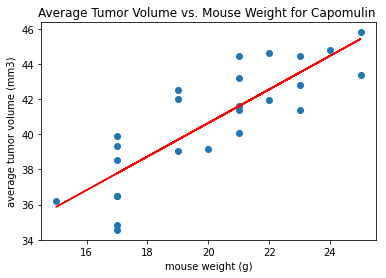

In [362]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()

## Correlation and Regression

In [360]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(each_mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}.")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


In [348]:
#perform a linear regression model on average tumor volume vs. mouse weight for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values + slope + intercept
print(regress_values)


[44.50660022 43.50660022 39.50660022 41.50660022 44.50660022 46.50660022
 42.50660022 45.50660022 43.50660022 43.50660022 41.50660022 39.50660022
 41.50660022 47.50660022 39.50660022 47.50660022 39.50660022 45.50660022
 39.50660022 39.50660022 43.50660022 45.50660022 43.50660022 37.50660022
 39.50660022]


In [356]:
#Create line equation string

line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.95x +21.55


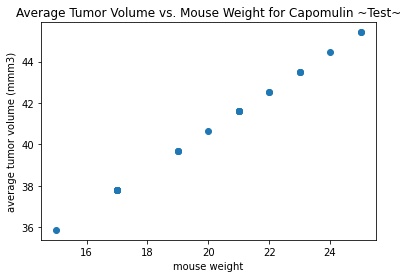

In [514]:
# Plot line to plot (real work for HW is above; this is a test!!)

# fit = 0.95 * x +21.55
plt.scatter(x_values, y_values)
# plt.plot(x_values, fit, "--")
# plt.xticks(year, rotation=90)
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume (mmm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ~Test~')
plt.show()

In [515]:
test3_df = clean_dataframe_df[clean_dataframe_df["Drug Regimen"].isin(["Capomulin"])]
test3_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [519]:
#count of mice on Capomulin treatment 
test3_df["Mouse ID"].nunique()


25